In [26]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv("shampoo-sales.csv",index_col =0, parse_dates=[0],date_parser = parser)

In [28]:
sales.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


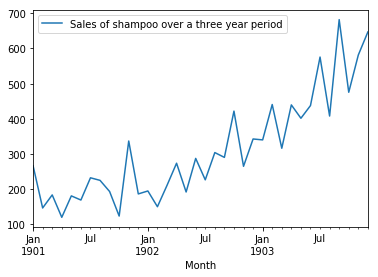

In [29]:
sales.plot()

Stationary means mean,variance and covariance is constant over periods.

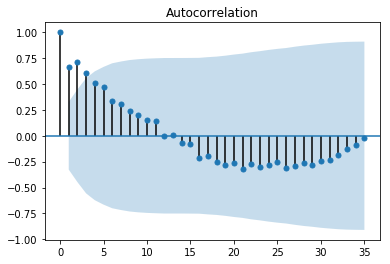

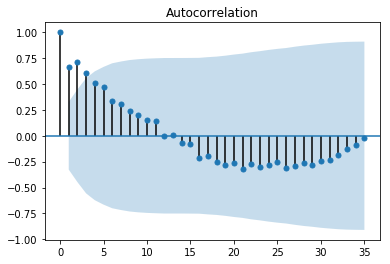

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

# Converting series to stationary

In [31]:
sales.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [32]:
sales.shift(1)

,Sales of shampoo over a three year period
Month,
1901-01-01,NaN
1901-02-01,266.0
1901-03-01,145.9
1901-04-01,183.1
1901-05-01,119.3
1901-06-01,180.3
1901-07-01,168.5
1901-08-01,231.8
1901-09-01,224.5


In [33]:
sales_diff = sales.diff(periods=1)
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

In [34]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales of shampoo over a three year period
Month,
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8


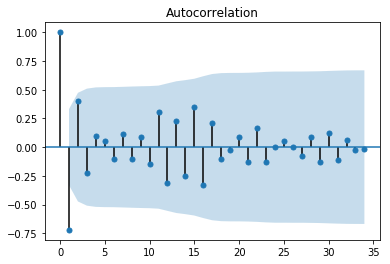

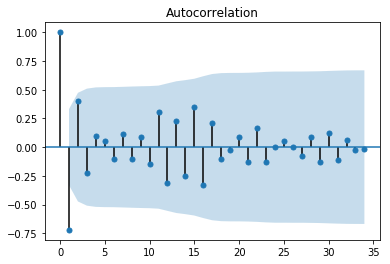

In [35]:
plot_acf(sales_diff)

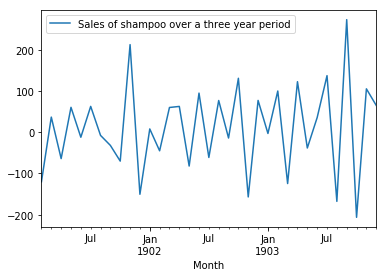

In [36]:
sales_diff.plot()

In [37]:
X = sales.values
train = X[0:28] # 27 data as train data
test = X[28:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28
8


# ARIMA model

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [41]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 335.090405114
(0, 0, 1) 334.3872829957554
(0, 0, 2) 329.31881164853866
(0, 0, 3) 330.92416191319046
(0, 0, 4) nan
(0, 0, 5) nan
(0, 1, 0) 324.422045261
(0, 1, 1) 308.0017050784539
(0, 1, 2) 306.7698573618047
(0, 2, 0) 343.45023972
(0, 2, 1) 318.26218827679946
(1, 0, 0) 330.89180942559716
(1, 0, 1) 325.63339493771554
(1, 0, 2) 322.45243610833955
(1, 0, 4) 324.23802125967546
(1, 1, 0) 309.1188767752589
(1, 1, 1) 306.79093608908283
(1, 1, 2) 306.91086651444687
(1, 1, 3) 311.8713030853371
(1, 1, 4) 309.11946068136604
(1, 1, 5) 314.6273825787657
(1, 2, 0) 317.80308367611093
(1, 2, 1) 304.2885462718525
(1, 2, 4) 301.84243510356686
(2, 0, 0) 322.09349459126526
(2, 0, 1) 332.6125126521117
(2, 1, 0) 310.4797159942327
(2, 1, 1) 308.67508697382726
(2, 1, 4) 310.7392456001239
(2, 1, 5) 309.2613029479631
(2, 2, 0) 317.24389670047566
(2, 2, 1) 305.7053644719475
(2, 2, 3) 301.97341543358317
(3, 0, 0) 324.0564894639567
(3, 1, 0) 305.21331482411324
(3, 1, 1) 306.4702994791246
(3, 1, 2) 303.36

It seems that out of different combinations ranging from order (0,0,0) to (5,5,5) param with values as p=3, d=2 and q=3 is the best because of lowest AIC value 

In [42]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(3,2,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

298.7706870262112


In [43]:
predictions = model_arima_fit.forecast(steps=8)[0]
predictions

array([ 334.2568759 ,  464.32722859,  426.09230964,  496.34485252,
        443.78963949,  500.24255128,  504.44514129,  564.70471479])

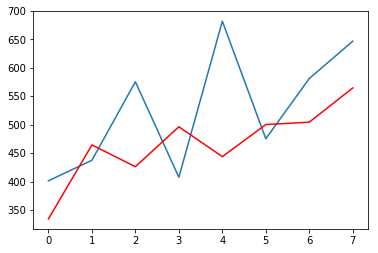

In [44]:
plt.plot(test)
plt.plot(predictions, color='red')

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

13180.900482035144